# Backtracking

In [1]:
from time import time

from tp3.archivos import leer_archivo

class HittingSet():
    def __init__(self, deseos_prensa):
        self._solucion = None
        self._deseos_prensa = deseos_prensa
    
    def buscar_solucion(self):
        self._buscar_solucion(self._deseos_prensa, [], [])
        return self._solucion

    def _buscar_solucion(self, deseos_prensa, convocados, descartados):
        if self._solucion and len(self._solucion) <= len(convocados):
            return
            
        deseos_prensa = _deseos_restantes(deseos_prensa, convocados)
        
        if len(deseos_prensa) == 0:
            self._marcar_mejor_solucion(convocados)
            return
    
        jugador = _jugador_siguiente(deseos_prensa, descartados)
    
        if jugador == None:
            return
    
        if not _algun_deseo_se_puede_cumplir(deseos_prensa, descartados):
            return
                
        self._buscar_solucion(deseos_prensa, convocados, [*descartados, jugador])
        self._buscar_solucion(deseos_prensa, [*convocados, jugador], descartados)


    def _marcar_mejor_solucion(self, nueva_solucion):
        if not self._solucion or len(nueva_solucion) < len(self._solucion):
            self._solucion = nueva_solucion
            
        return self._solucion

def _deseos_restantes(deseos_prensa, convocados):
    deseos_restantes = []

    for deseo in deseos_prensa:
        cumplido = any(filter(lambda jugador: jugador in deseo, convocados))
        
        if not cumplido:
            deseos_restantes.append(deseo)
    
    return deseos_restantes

def _jugador_siguiente(deseos_prensa, descartados):
    for deseo in deseos_prensa:
        for jugador in deseo:
            if jugador in descartados:
                continue
            return jugador
    return None
    
def _algun_deseo_se_puede_cumplir(deseos_prensa, descartados):
    for deseo in deseos_prensa:
        if any(filter(lambda jugador: not jugador in descartados, deseo)):
            continue
        return False
    return True

def es_hitting_set(deseos_prensa, convocados):
    return not any(_deseos_restantes(deseos_prensa, convocados))

def hitting_set_backtracking(deseos_prensa):
    return HittingSet(deseos_prensa).buscar_solucion()

def test_backtracking(file):
    jugadores, deseos_prensa = leer_archivo(file)

    start = time()
    print("Start for", file)
    convocados = hitting_set_backtracking(deseos_prensa)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [2]:
soluciones_backtracking = []
for numero_archivo in range(10, 80, 10):
    solucion, tiempo = test_backtracking(f"../notebooks/{numero_archivo}.txt")
    soluciones_backtracking.append((numero_archivo, tiempo))

Start for ../notebooks/10.txt
End: 0.004999876022338867 s.
SOLUCION ----> ['Jugador_35', 'Jugador_22', 'Jugador_12', 'Jugador_10']  ( 4 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/20.txt
End: 0.13049960136413574 s.
SOLUCION ----> ['Jugador_13', 'Jugador_27', 'Jugador_46', 'Jugador_33', 'Jugador_11', 'Jugador_3']  ( 6 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/30.txt
End: 1.6979992389678955 s.
SOLUCION ----> ['Jugador_29', 'Jugador_3', 'Jugador_45', 'Jugador_43', 'Jugador_16', 'Jugador_18', 'Jugador_15']  ( 7 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/40.txt
End: 35.0155074596405 s.
SOLUCION ----> ['Jugador_2', 'Jugador_0', 'Jugador_32', 'Jugador_4', 'Jugador_9', 'Jugador_34', 'Jugador_36', 'Jugador_40', 'Jugador_15']  ( 9 )
++++ ES VALIDA ++++
-------------------------------

# Programacion lineal

In [3]:
!pip install pulp


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

def hitting_set_programacion_lineal(deseos):
    jugadores = set.union(*deseos)
    x = LpVariable.dicts('x', jugadores, cat='Binary')
    
    hitting_set = LpProblem("HittingSet", LpMinimize)
    hitting_set += lpSum(x[jugador] for jugador in jugadores)
    for deseo in deseos:
        hitting_set += lpSum(x[jugador] for jugador in deseo) >= 1

    hitting_set.solve()
    convocados = [jugador for jugador in jugadores if x[jugador].value() == 1]
    return convocados

def test_programacion_lineal(file):
    _, deseos_prensa = leer_archivo(file)

    deseos = [set(jugador) for jugador in deseos_prensa]
    start = time()
    print("Start for", file)
    convocados = hitting_set_programacion_lineal(deseos)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [5]:
soluciones_programacion_lineal = []
for numero_archivo in range(100, 1100, 100):
    solucion, tiempo = test_programacion_lineal(f"../notebooks/{numero_archivo}.txt")
    soluciones_programacion_lineal.append((numero_archivo, tiempo))

Start for ../notebooks/100.txt
End: 0.12449979782104492 s.
SOLUCION ----> ['Jugador_37', 'Jugador_30', 'Jugador_10', 'Jugador_41', 'Jugador_6', 'Jugador_4', 'Jugador_45', 'Jugador_16', 'Jugador_42', 'Jugador_2', 'Jugador_48', 'Jugador_43', 'Jugador_24']  ( 13 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/200.txt
End: 0.8234994411468506 s.
SOLUCION ----> ['Jugador_30', 'Jugador_41', 'Jugador_6', 'Jugador_31', 'Jugador_11', 'Jugador_4', 'Jugador_46', 'Jugador_45', 'Jugador_29', 'Jugador_42', 'Jugador_2', 'Jugador_5', 'Jugador_36', 'Jugador_1', 'Jugador_47', 'Jugador_39']  ( 16 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/300.txt
End: 4.430002212524414 s.
SOLUCION ----> ['Jugador_13', 'Jugador_30', 'Jugador_41', 'Jugador_15', 'Jugador_11', 'Jugador_28', 'Jugador_12', 'Jugador_35', 'Jugador_0', 'Jugador_44', 'Jugador_21', 'Jugador_25', 'Jugador_48', 'Ju

# Algoritmo Bilardo

In [6]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpStatus

def hitting_set_aproximacion_bilardo(deseos):
    b = max(len(deseo) for deseo in deseos)
    jugadores = set.union(*deseos)
    x = LpVariable.dict("x", jugadores, lowBound=0, upBound=1, cat='Continuous')
    
    hitting_set_aproximado = LpProblem(name="HittingSetAproximado", sense=LpMinimize)
    hitting_set_aproximado += lpSum(x[jugador] for jugador in jugadores)
    for deseo in deseos:
        hitting_set_aproximado += lpSum(x[jugador] for jugador in deseo) >= 1
        
    hitting_set_aproximado.solve()
    convocados = [jugador for jugador in jugadores if x[jugador].value() >= 1/b]
    return convocados

def test_aproximacion_bilardo(file):
    _, deseos_prensa = leer_archivo(file)

    deseos = [set(jugador) for jugador in deseos_prensa]
    start = time()
    print("Start for", file)
    convocados = hitting_set_aproximacion_bilardo(deseos)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [7]:
soluciones_aproximacion_bilardo = []
archivos = ["../examples/5.txt", "../examples/7.txt", "../examples/10_pocos.txt", "../examples/10_varios.txt", "../examples/10_todos.txt",
            "../examples/15.txt", "../examples/20.txt", "../examples/50.txt", "../examples/75.txt", "../examples/100.txt", "../examples/200.txt",
           "../notebooks/500.txt", "../notebooks/1000.txt", "../notebooks/2000.txt", "../notebooks/4000.txt", "../notebooks/8000.txt"]
for numero_archivo in range(1000, 51000, 1000):
    solucion, tiempo = test_aproximacion_bilardo(f"../notebooks/{numero_archivo}.txt")
    soluciones_aproximacion_bilardo.append((numero_archivo, tiempo))

Start for ../notebooks/1000.txt
End: 0.06599950790405273 s.
SOLUCION ----> ['Jugador_13', 'Jugador_8', 'Jugador_26', 'Jugador_23', 'Jugador_22', 'Jugador_37', 'Jugador_18', 'Jugador_49', 'Jugador_17', 'Jugador_30', 'Jugador_10', 'Jugador_41', 'Jugador_6', 'Jugador_15', 'Jugador_7', 'Jugador_31', 'Jugador_11', 'Jugador_33', 'Jugador_4', 'Jugador_46', 'Jugador_28', 'Jugador_35', 'Jugador_45', 'Jugador_12', 'Jugador_16', 'Jugador_29', 'Jugador_0', 'Jugador_44', 'Jugador_42', 'Jugador_2', 'Jugador_9', 'Jugador_25', 'Jugador_21', 'Jugador_19', 'Jugador_34', 'Jugador_48', 'Jugador_40', 'Jugador_5', 'Jugador_14', 'Jugador_36', 'Jugador_1', 'Jugador_32', 'Jugador_27', 'Jugador_47', 'Jugador_43', 'Jugador_3', 'Jugador_39', 'Jugador_24', 'Jugador_20', 'Jugador_38']  ( 50 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/2000.txt
End: 0.1080009937286377 s.
SOLUCION ----> ['Jugador_13', 'Jugador_8', 'Jugador_26', 'Jugador_23', 'Jugad

# Greedy

In [8]:
def hitting_set_greedy(deseos_prensa):
    convocados = []

    while len(deseos_prensa) > 0:
        cant_jugadores = {}
        max = None
        
        for deseo in deseos_prensa:
            for jugador in deseo:
                cant_jugadores[jugador] = cant_jugadores.get(jugador, 0) + 1
                if not max or cant_jugadores[jugador] > cant_jugadores[max]:
                    max = jugador
                    
        convocados.append(max)
        deseos_prensa = _deseos_restantes(deseos_prensa, convocados)
    return convocados


def test_greedy(file):
    _, deseos_prensa = leer_archivo(file)

    start = time()
    print("Start for", file)
    convocados = hitting_set_greedy(deseos_prensa)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [9]:
soluciones_greedy = []
archivos = ["../examples/5.txt", "../examples/7.txt", "../examples/10_pocos.txt", "../examples/10_varios.txt", "../examples/10_todos.txt",
            "../examples/15.txt", "../examples/20.txt", "../examples/50.txt", "../examples/75.txt", "../examples/100.txt", "../examples/200.txt",
           "../notebooks/500.txt", "../notebooks/1000.txt", "../notebooks/2000.txt", "../notebooks/4000.txt", "../notebooks/8000.txt"]
for numero_archivo in range(1000, 51000, 1000):
    solucion, tiempo = test_greedy(f"../notebooks/{numero_archivo}.txt")
    soluciones_greedy.append((numero_archivo, tiempo))

Start for ../notebooks/1000.txt
End: 0.012998104095458984 s.
SOLUCION ----> ['Jugador_43', 'Jugador_17', 'Jugador_4', 'Jugador_48', 'Jugador_26', 'Jugador_25', 'Jugador_29', 'Jugador_33', 'Jugador_13', 'Jugador_41', 'Jugador_38', 'Jugador_40', 'Jugador_2', 'Jugador_14', 'Jugador_44', 'Jugador_21', 'Jugador_24', 'Jugador_22', 'Jugador_45', 'Jugador_16', 'Jugador_0', 'Jugador_20', 'Jugador_42', 'Jugador_3', 'Jugador_11', 'Jugador_28', 'Jugador_18']  ( 27 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/2000.txt
End: 0.026000261306762695 s.
SOLUCION ----> ['Jugador_33', 'Jugador_31', 'Jugador_43', 'Jugador_3', 'Jugador_11', 'Jugador_36', 'Jugador_22', 'Jugador_35', 'Jugador_29', 'Jugador_34', 'Jugador_4', 'Jugador_9', 'Jugador_30', 'Jugador_13', 'Jugador_20', 'Jugador_38', 'Jugador_28', 'Jugador_10', 'Jugador_14', 'Jugador_8', 'Jugador_0', 'Jugador_41', 'Jugador_37', 'Jugador_49', 'Jugador_21', 'Jugador_2', 'Jugador_26', 'J

In [10]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

def plot_resultados(resultados):
    deseos = [resultado[0] for resultado in resultados]
    tiempos = [resultado[1] for resultado in resultados]
    
    plt.plot(deseos, tiempos, label= "Tiempo segun cantidad de deseos",  marker='o', linestyle='-')
    plt.xlabel('Deseos')
    plt.ylabel('Tiempo (s)')
    plt.title('Tiempo de ejecucion por cantidad de deseos')
    plt.grid(True)
    plt.legend()
    
    plt.show()

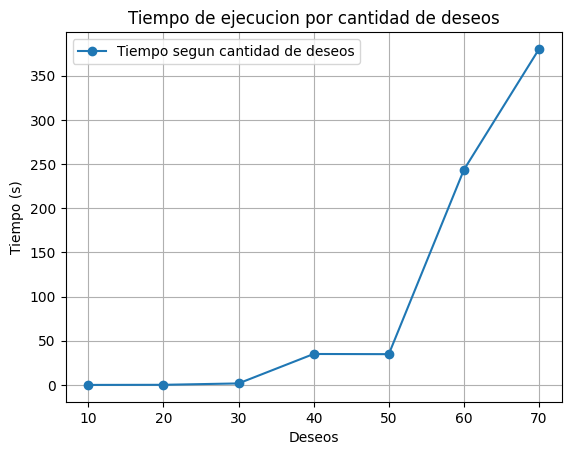

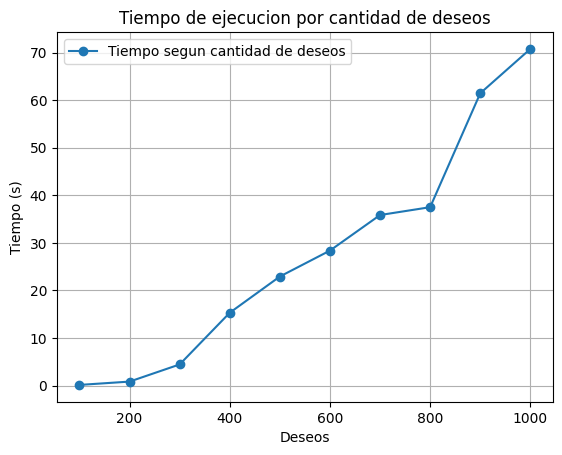

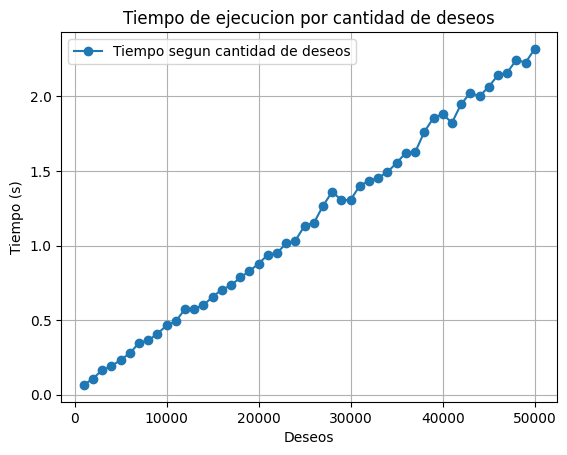

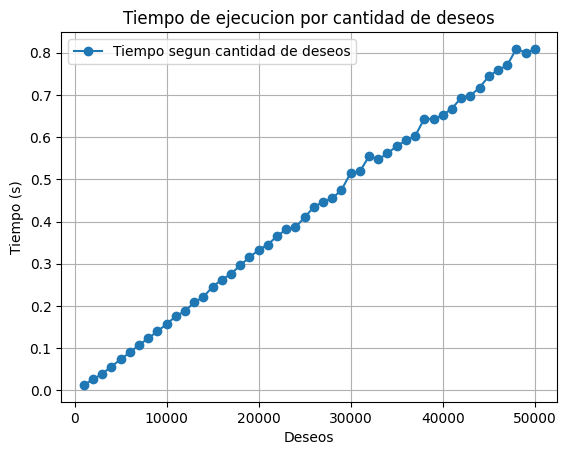

In [12]:
plot_resultados(soluciones_backtracking)
plot_resultados(soluciones_programacion_lineal)
plot_resultados(soluciones_aproximacion_bilardo)
plot_resultados(soluciones_greedy)

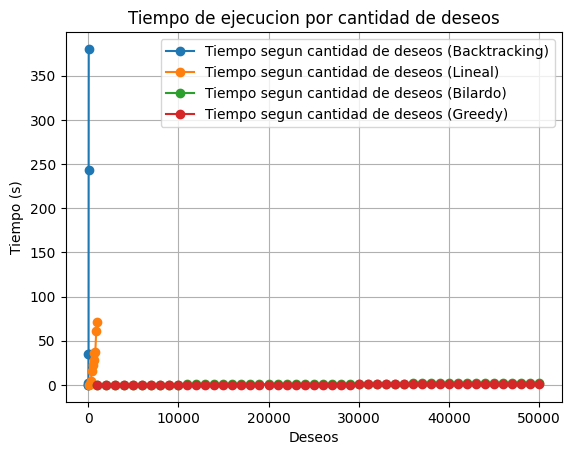

In [13]:
deseos_backtracking = [resultado[0] for resultado in soluciones_backtracking]
tiempos_backtracking = [resultado[1] for resultado in soluciones_backtracking]

deseos_programacion_lineal = [resultado[0] for resultado in soluciones_programacion_lineal]
tiempos_programacion_lineal = [resultado[1] for resultado in soluciones_programacion_lineal]

deseos_aproximacion_bilardo = [resultado[0] for resultado in soluciones_aproximacion_bilardo]
tiempos_aproximacion_bilardo = [resultado[1] for resultado in soluciones_aproximacion_bilardo]

deseos_greedy = [resultado[0] for resultado in soluciones_greedy]
tiempos_greedy = [resultado[1] for resultado in soluciones_greedy]
    
plt.plot(deseos_backtracking, tiempos_backtracking, label= "Tiempo segun cantidad de deseos (Backtracking)",  marker='o', linestyle='-')
plt.plot(deseos_programacion_lineal, tiempos_programacion_lineal, label= "Tiempo segun cantidad de deseos (Lineal)",  marker='o', linestyle='-')
plt.plot(deseos_aproximacion_bilardo, tiempos_aproximacion_bilardo, label= "Tiempo segun cantidad de deseos (Bilardo)",  marker='o', linestyle='-')
plt.plot(deseos_greedy, tiempos_greedy, label= "Tiempo segun cantidad de deseos (Greedy)",  marker='o', linestyle='-')
plt.xlabel('Deseos')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecucion por cantidad de deseos')
plt.grid(True)
plt.legend()

plt.show()